# Model Classification

In [1]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from os import path

# Toolkit

In [2]:
def loadexcel(x):#, #y = 'Sheet1'):
    run = True
    file= pd.ExcelFile(x)
    names = file.sheet_names
    names = re.sub("'",'', str(names))
    print ("This file contains this tab names:", names )
    while run is True:
        try:
            decision = (input("Choose your tab name? "))
            print ("Your choice is", decision)
            confirm = int(input("This is correct? Please write 1 for yes or 2 for no "))
            if confirm == 1:
                print ("Processing Tab, please wait")
                final_file = file.parse(decision)
                return final_file
                run = False
            else:
                print ('Choose the right tab!') 
        except Exception as e:
            print ("There is an error: ", e)
            print ("Please Try Again! :)")
            continue
            
def loading_excel():
    x = input('\033[94m'+'Please write your file location: ' +'\033[0m')
    real_x = path.realpath(x)
    doc = loadexcel(real_x) 
    return doc

In [3]:
def mergefield(x, jo=""):
    bold = "\033[1m"
    end =  "\033[0m"
    GREEN = '\033[92m'
    i=-1
    names = list(x)
    b = dict(enumerate(names))
    print ("This file contains this columns:" )
    for name in names:
        i=i+1
        print(str(i)+"."+" "+ name)
    print (bold+GREEN+"Choose the columns you want to merge."+end)
    election = input().split(",")
    item = list(map(int, election))
    convert = [b[y] for y in item]
    print("Your Choice is", convert)
    stripped = x[convert].fillna('').apply(lambda x: x.str.strip())
    join_symb = jo
    stripped = stripped.astype(str).apply(join_symb.join, axis=1)
    return stripped

In [4]:
def filtersame(x,y):  
    words_equal = []
    for word in x:
        if word in y:
            words_equal += [word]
    return words_equal

def removequal(x,y):  
    words_dif = []
    for word in y:
        if word not in x:
            words_dif += [word]
    return words_dif

In [5]:
from nltk.corpus import stopwords #create a variable to delete common words

def stopwords_list( lan ='spanish'):
    lan = str(lan)
    stopwords_es = stopwords.words(lan)
    stop_es = pd.DataFrame(stopwords_es)
    stop_es.columns =['StopWords']
    es_pal = '\\b'+stop_es['StopWords'].str.lower().astype(str)+'\\b'
    es_pal = es_pal.tolist()
    return es_pal

# Loading Files

In [6]:
from os import path
import pandas as pd
import re #regex
from nltk.stem.lancaster import LancasterStemmer

In [7]:
#C:\Users\Gpardo\Desktop\Clasification\DB\Tablets Models.xlsx
db_tablets = loading_excel()
db_tablets.head()

Please write your file location: C:\Users\Gpardo\Desktop\Clasification\DB\Tablets Models V1.xlsx
This file contains this tab names: [Sheet1]
Choose your tab name? Sheet1
Your choice is Sheet1
This is correct? Please write 1 for yes or 2 for no 1
Processing Tab, please wait


,Period,Descripcion_Clean,Test Vendors,Modelo_1,Model ID,Vendor,Product,Model Name
0,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO 4 BUNDLE,MIC-TH2-00001,Microsoft,Detachable Tablet,Surface Pro 4 (i5) 256GB Wi-Fi
1,2017Q2,TABLET,LEVONO,TB3-850F,ZA170071CL,Lenovo,Slate Tablet,"Tab 3 7"" 16GB WiFi"
2,2017Q2,TABLET,LENOVO,TB3-850F,ZA170078CL,Lenovo,Slate Tablet,"Tab 3 830 8"" 16GB WiFi"
3,2017Q2,TABLET,AMAZON,FIRE HD7,AMZ-B00IKPYKWG,Amazon.com,Slate Tablet,"Kindle Fire HD 7"" 8GB WiFi"
4,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO TH4-00001,MIC-TH4-00001,Microsoft,Detachable Tablet,Surface Pro 4 (i5) 256GB Wi-Fi


In [8]:
db_tablets.head()
#db_tablets[['Period','Descripcion_Clean.1', 'Test Vendors.1', 'Modelo_1.1', 'Vendor.1', 'Product.1', 'Model Name.1']]

,Period,Descripcion_Clean,Test Vendors,Modelo_1,Model ID,Vendor,Product,Model Name
0,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO 4 BUNDLE,MIC-TH2-00001,Microsoft,Detachable Tablet,Surface Pro 4 (i5) 256GB Wi-Fi
1,2017Q2,TABLET,LEVONO,TB3-850F,ZA170071CL,Lenovo,Slate Tablet,"Tab 3 7"" 16GB WiFi"
2,2017Q2,TABLET,LENOVO,TB3-850F,ZA170078CL,Lenovo,Slate Tablet,"Tab 3 830 8"" 16GB WiFi"
3,2017Q2,TABLET,AMAZON,FIRE HD7,AMZ-B00IKPYKWG,Amazon.com,Slate Tablet,"Kindle Fire HD 7"" 8GB WiFi"
4,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO TH4-00001,MIC-TH4-00001,Microsoft,Detachable Tablet,Surface Pro 4 (i5) 256GB Wi-Fi


# Stemming

In [9]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
db_tablets['Descripcion'] = db_tablets['Descripcion_Clean'].apply(lambda x : filter(None,x.split(" "))).apply(lambda x : [stemmer.stem(y) for y in x]).apply(lambda x : " ".join(x))
db_tablets.head()

,Period,Descripcion_Clean,Test Vendors,Modelo_1,Model ID,Vendor,Product,Model Name,Descripcion
0,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO 4 BUNDLE,MIC-TH2-00001,Microsoft,Detachable Tablet,Surface Pro 4 (i5) 256GB Wi-Fi,notebook
1,2017Q2,TABLET,LEVONO,TB3-850F,ZA170071CL,Lenovo,Slate Tablet,"Tab 3 7"" 16GB WiFi",tablet
2,2017Q2,TABLET,LENOVO,TB3-850F,ZA170078CL,Lenovo,Slate Tablet,"Tab 3 830 8"" 16GB WiFi",tablet
3,2017Q2,TABLET,AMAZON,FIRE HD7,AMZ-B00IKPYKWG,Amazon.com,Slate Tablet,"Kindle Fire HD 7"" 8GB WiFi",tablet
4,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO TH4-00001,MIC-TH4-00001,Microsoft,Detachable Tablet,Surface Pro 4 (i5) 256GB Wi-Fi,notebook


In [10]:
db_tablets['clean_line'] = mergefield(db_tablets, jo=" ") #8,2,3,4
db_tablets['Model Class'] = mergefield(db_tablets, jo=",") #5,6,7
db_tablets['Vendor Level'] = mergefield(db_tablets, jo=",") #5,6
db_tablets.head()

This file contains this columns:
0. Period
1. Descripcion_Clean
2. Test Vendors
3. Modelo_1
4. Model ID
5. Vendor
6. Product
7. Model Name
8. Descripcion
Choose the columns you want to merge.
8,2,3,4
Your Choice is ['Descripcion', 'Test Vendors', 'Modelo_1', 'Model ID']
This file contains this columns:
0. Period
1. Descripcion_Clean
2. Test Vendors
3. Modelo_1
4. Model ID
5. Vendor
6. Product
7. Model Name
8. Descripcion
9. clean_line
Choose the columns you want to merge.
5,6,7
Your Choice is ['Vendor', 'Product', 'Model Name']
This file contains this columns:
0. Period
1. Descripcion_Clean
2. Test Vendors
3. Modelo_1
4. Model ID
5. Vendor
6. Product
7. Model Name
8. Descripcion
9. clean_line
10. Model Class
Choose the columns you want to merge.
5,6
Your Choice is ['Vendor', 'Product']


,Period,Descripcion_Clean,Test Vendors,Modelo_1,Model ID,Vendor,Product,Model Name,Descripcion,clean_line,Model Class,Vendor Level
0,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO 4 BUNDLE,MIC-TH2-00001,Microsoft,Detachable Tablet,Surface Pro 4 (i5) 256GB Wi-Fi,notebook,notebook MICROSOFT SURFACE PRO 4 BUNDLE MIC-TH...,"Microsoft,Detachable Tablet,Surface Pro 4 (i5)...","Microsoft,Detachable Tablet"
1,2017Q2,TABLET,LEVONO,TB3-850F,ZA170071CL,Lenovo,Slate Tablet,"Tab 3 7"" 16GB WiFi",tablet,tablet LEVONO TB3-850F ZA170071CL,"Lenovo,Slate Tablet,Tab 3 7"" 16GB WiFi","Lenovo,Slate Tablet"
2,2017Q2,TABLET,LENOVO,TB3-850F,ZA170078CL,Lenovo,Slate Tablet,"Tab 3 830 8"" 16GB WiFi",tablet,tablet LENOVO TB3-850F ZA170078CL,"Lenovo,Slate Tablet,Tab 3 830 8"" 16GB WiFi","Lenovo,Slate Tablet"
3,2017Q2,TABLET,AMAZON,FIRE HD7,AMZ-B00IKPYKWG,Amazon.com,Slate Tablet,"Kindle Fire HD 7"" 8GB WiFi",tablet,tablet AMAZON FIRE HD7 AMZ-B00IKPYKWG,"Amazon.com,Slate Tablet,Kindle Fire HD 7"" 8GB ...","Amazon.com,Slate Tablet"
4,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO TH4-00001,MIC-TH4-00001,Microsoft,Detachable Tablet,Surface Pro 4 (i5) 256GB Wi-Fi,notebook,notebook MICROSOFT SURFACE PRO TH4-00001 MIC-T...,"Microsoft,Detachable Tablet,Surface Pro 4 (i5)...","Microsoft,Detachable Tablet"


In [11]:
working_db=db_tablets.copy()
working_db['Model Category'] = working_db['Model Class'].astype('category')
working_db['Model Category'] = working_db['Model Category'].cat.codes
working_db['Vendor Category'] = working_db['Vendor Level'].astype('category')
working_db['Vendor Category'] = working_db['Vendor Category'].cat.codes
working_db.head()

,Period,Descripcion_Clean,Test Vendors,Modelo_1,Model ID,Vendor,Product,Model Name,Descripcion,clean_line,Model Class,Vendor Level,Model Category,Vendor Category
0,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO 4 BUNDLE,MIC-TH2-00001,Microsoft,Detachable Tablet,Surface Pro 4 (i5) 256GB Wi-Fi,notebook,notebook MICROSOFT SURFACE PRO 4 BUNDLE MIC-TH...,"Microsoft,Detachable Tablet,Surface Pro 4 (i5)...","Microsoft,Detachable Tablet",295,45
1,2017Q2,TABLET,LEVONO,TB3-850F,ZA170071CL,Lenovo,Slate Tablet,"Tab 3 7"" 16GB WiFi",tablet,tablet LEVONO TB3-850F ZA170071CL,"Lenovo,Slate Tablet,Tab 3 7"" 16GB WiFi","Lenovo,Slate Tablet",239,37
2,2017Q2,TABLET,LENOVO,TB3-850F,ZA170078CL,Lenovo,Slate Tablet,"Tab 3 830 8"" 16GB WiFi",tablet,tablet LENOVO TB3-850F ZA170078CL,"Lenovo,Slate Tablet,Tab 3 830 8"" 16GB WiFi","Lenovo,Slate Tablet",241,37
3,2017Q2,TABLET,AMAZON,FIRE HD7,AMZ-B00IKPYKWG,Amazon.com,Slate Tablet,"Kindle Fire HD 7"" 8GB WiFi",tablet,tablet AMAZON FIRE HD7 AMZ-B00IKPYKWG,"Amazon.com,Slate Tablet,Kindle Fire HD 7"" 8GB ...","Amazon.com,Slate Tablet",68,8
4,2017Q2,NOTEBOOK,MICROSOFT,SURFACE PRO TH4-00001,MIC-TH4-00001,Microsoft,Detachable Tablet,Surface Pro 4 (i5) 256GB Wi-Fi,notebook,notebook MICROSOFT SURFACE PRO TH4-00001 MIC-T...,"Microsoft,Detachable Tablet,Surface Pro 4 (i5)...","Microsoft,Detachable Tablet",295,45


In [12]:
model_dict = working_db[['Model Class','Model Category']].set_index('Model Category')['Model Class'].to_dict()
Vendor_dict = working_db[['Vendor Level','Vendor Category']].set_index('Vendor Category')['Vendor Level'].to_dict()

In [13]:
#models_data
models_data = working_db[['clean_line','Model Category']]
models_data['clean_line_no_symb'] = models_data['clean_line'].str.replace(r'\W'," ",case=False)
models_data.head()

,clean_line,Model Category,clean_line_no_symb
0,notebook MICROSOFT SURFACE PRO 4 BUNDLE MIC-TH...,295,notebook MICROSOFT SURFACE PRO 4 BUNDLE MIC TH...
1,tablet LEVONO TB3-850F ZA170071CL,239,tablet LEVONO TB3 850F ZA170071CL
2,tablet LENOVO TB3-850F ZA170078CL,241,tablet LENOVO TB3 850F ZA170078CL
3,tablet AMAZON FIRE HD7 AMZ-B00IKPYKWG,68,tablet AMAZON FIRE HD7 AMZ B00IKPYKWG
4,notebook MICROSOFT SURFACE PRO TH4-00001 MIC-T...,295,notebook MICROSOFT SURFACE PRO TH4 00001 MIC T...


In [14]:
vendors_data = working_db[['clean_line','Vendor Category']]
vendors_data['clean_line_no_symb'] = models_data['clean_line'].str.replace(r'\W'," ",case=False)
vendors_data.head()

,clean_line,Vendor Category,clean_line_no_symb
0,notebook MICROSOFT SURFACE PRO 4 BUNDLE MIC-TH...,45,notebook MICROSOFT SURFACE PRO 4 BUNDLE MIC TH...
1,tablet LEVONO TB3-850F ZA170071CL,37,tablet LEVONO TB3 850F ZA170071CL
2,tablet LENOVO TB3-850F ZA170078CL,37,tablet LENOVO TB3 850F ZA170078CL
3,tablet AMAZON FIRE HD7 AMZ-B00IKPYKWG,8,tablet AMAZON FIRE HD7 AMZ B00IKPYKWG
4,notebook MICROSOFT SURFACE PRO TH4-00001 MIC-T...,45,notebook MICROSOFT SURFACE PRO TH4 00001 MIC T...


In [15]:
esp_list= stopwords_list()
models_data['clean_line_no_symb'] = models_data['clean_line_no_symb'] .str.replace('|'.join(esp_list), "", case=False).str.replace('\s\s+', " ", case=False)
models_data['clean_line_no_symb'] = models_data['clean_line_no_symb'].str.lower()
models_data.head()

,clean_line,Model Category,clean_line_no_symb
0,notebook MICROSOFT SURFACE PRO 4 BUNDLE MIC-TH...,295,notebook microsoft surface pro 4 bundle mic th...
1,tablet LEVONO TB3-850F ZA170071CL,239,tablet levono tb3 850f za170071cl
2,tablet LENOVO TB3-850F ZA170078CL,241,tablet lenovo tb3 850f za170078cl
3,tablet AMAZON FIRE HD7 AMZ-B00IKPYKWG,68,tablet amazon fire hd7 amz b00ikpykwg
4,notebook MICROSOFT SURFACE PRO TH4-00001 MIC-T...,295,notebook microsoft surface pro th4 00001 mic t...


In [16]:
esp_list= stopwords_list()
vendors_data['clean_line_no_symb'] = vendors_data['clean_line_no_symb'] .str.replace('|'.join(esp_list), "", case=False).str.replace('\s\s+', " ", case=False)
vendors_data['clean_line_no_symb'] = vendors_data['clean_line_no_symb'].str.lower()
vendors_data.head()

,clean_line,Vendor Category,clean_line_no_symb
0,notebook MICROSOFT SURFACE PRO 4 BUNDLE MIC-TH...,45,notebook microsoft surface pro 4 bundle mic th...
1,tablet LEVONO TB3-850F ZA170071CL,37,tablet levono tb3 850f za170071cl
2,tablet LENOVO TB3-850F ZA170078CL,37,tablet lenovo tb3 850f za170078cl
3,tablet AMAZON FIRE HD7 AMZ-B00IKPYKWG,8,tablet amazon fire hd7 amz b00ikpykwg
4,notebook MICROSOFT SURFACE PRO TH4-00001 MIC-T...,45,notebook microsoft surface pro th4 00001 mic t...


# Model Distribution

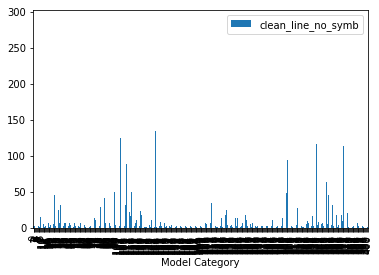

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
models_data[['clean_line_no_symb','Model Category']].groupby('Model Category').count().plot.bar(ylim=0)
plt.show()

# Vendor Distribution

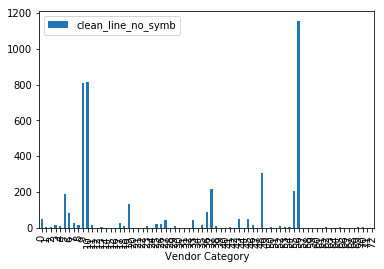

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
vendors_data[['clean_line_no_symb','Vendor Category']].groupby('Vendor Category').count().plot.bar(ylim=0)
plt.show()

# Data for Machine

In [27]:
features = models_data['clean_line_no_symb'].str.lower()
labels = models_data['Model Category'].astype(int)
#labels = vendors_data['Vendor Category']

# Model Selection

## Word2vec

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=3, ngram_range=(1, 3)).fit(features)

# Finding the Best Model

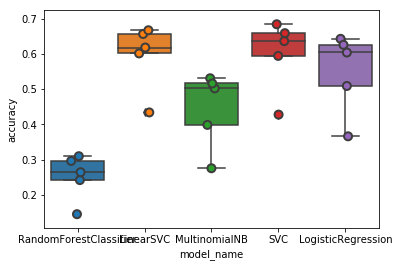

model_name
LinearSVC                 0.595654
LogisticRegression        0.549705
MultinomialNB             0.444599
RandomForestClassifier    0.251075
SVC                       0.600492
Name: accuracy, dtype: float64


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    SVC(C=1000, gamma=0.001,kernel='rbf'),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, vect.transform(features), labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

print(cv_df.groupby('model_name').accuracy.mean())

SVC Models get better accuracy

# Finding the best params

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    vect.transform(features), labels, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.000 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.006 (+/-0.005) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.172 (+/-0.166) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.006 (+/-0.005) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.414 (+/-0.208) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.172 (+/-0.166) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.382 (+/-0.257) for {'C': 1, 'kernel': 'linear'}
0.405 (+/-0.168) for {'C': 10, 'kernel': 'linear'}
0.405 (+/-0.168) for {'C': 100, 'kernel': 'linear'}
0.404 (+/-0.167) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.006 (+/-0.005) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.006 (+/-0.005) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.012 (+/-0.010) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.006 (+/-0.005) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.185 (+/-0.164) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.012 (+/-0.010) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.477 (+/-0.170) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.185 (+/-0.164) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.441 (+/-0.229) for {'C': 1, 'kernel': 'linear'}
0.461 (+/-0.118) for {'C': 10, 'kernel': 'linear'}
0.461 (+/-0.118) for {'C': 100, 'kernel': 'linear'}
0.460 (+/-0.116) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

# Final Classifier

In [31]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=0)

vect = TfidfVectorizer(min_df=3, ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
model = SVC(C= 10, kernel = 'linear')
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))

print('F1 Measure: %.3f' % f1_score(y_test.astype(int),predictions, average='micro'))
print('Precision: %.3f' % precision_score(y_test.astype(int),predictions, average='micro'))
print('F1 Measure: %.3f' % recall_score(y_test.astype(int),predictions, average='micro'))

F1 Measure: 0.601
Precision: 0.601
F1 Measure: 0.601


# Vendors Approach

In [32]:
features_v = vendors_data['clean_line_no_symb'].str.lower()
labels_v = vendors_data['Vendor Category'].astype(int)

# Model Selection

# Word2vec

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect_v = TfidfVectorizer(min_df=3, ngram_range=(1, 3)).fit(features_v)

# Model Selection

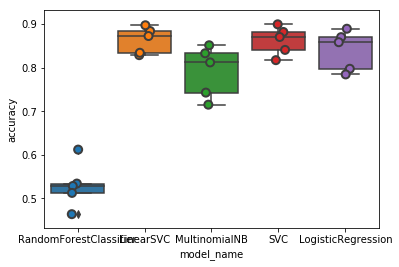

model_name
LinearSVC                 0.863661
LogisticRegression        0.840245
MultinomialNB             0.791158
RandomForestClassifier    0.530401
SVC                       0.862253
Name: accuracy, dtype: float64


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    SVC(C=1000, gamma=0.001,kernel='rbf'),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, vect_v.transform(features_v), labels_v, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

print(cv_df.groupby('model_name').accuracy.mean())

# Finding the best Params

In [35]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    vect.transform(features_v), labels_v, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.007 (+/-0.004) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.007 (+/-0.004) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.050 (+/-0.025) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.007 (+/-0.004) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.462 (+/-0.235) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.050 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.617 (+/-0.208) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.462 (+/-0.235) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.635 (+/-0.245) for {'C': 1, 'kernel': 'linear'}
0.621 (+/-0.216) for {'C': 10, 'kernel': 'linear'}
0.622 (+/-0.215) for {'C': 100, 'kernel': 'linear'}
0.608 (+/-0.194) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full eva

# Final Classifier test

In [36]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(features_v, labels_v, test_size=0.5, random_state=0)

vect = TfidfVectorizer(min_df=3, ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
#model = SVC(C= 10, kernel = 'linear')
model = SVC(C= 1000, gamma = 0.001,  kernel = 'rbf')
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))

print('F1 Measure: %.3f' % f1_score(y_test.astype(int),predictions, average='micro'))
print('Precision: %.3f' % precision_score(y_test.astype(int),predictions, average='micro'))
print('F1 Measure: %.3f' % recall_score(y_test.astype(int),predictions, average='micro'))

F1 Measure: 0.902
Precision: 0.902
F1 Measure: 0.902


# Testing with the original database

In [37]:
# C:\Users\Gpardo\Desktop\Clasification\DB_Final.xlsx
db_tablets_org = loading_excel()
db_tablets_org.head()

Please write your file location: C:\Users\Gpardo\Desktop\Clasification\DB_Final.xlsx
This file contains this tab names: [SVC, SVC No Symb, SVC No Symb ORG, Trash Check, Tablet Check, PC Check, DB CHECK, Sheet1]
Choose your tab name? SVC No Symb ORG
Your choice is SVC No Symb ORG
This is correct? Please write 1 for yes or 2 for no 1
Processing Tab, please wait


,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean,Predictions SVC,Label,Final Label,Cantidad_Mercancias,Ano,Mes,Predictions New SVC,Last Revision Label
0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets,Tablets,4000.0,2018,5,1,Tablets
1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets,Tablets,200.0,2018,5,1,Tablets
2,NOTE-BOOKS- USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,APARATO DE PESO INF. A 2C KILOS PARA EL TRATAM...,NOTE BOOKS USADO ANO 2017,LENOVO,20HF0011US/SERIAL/PC0RXYS-,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US/SE...,NOTE BOOKS USADO ANO 2017 LENOVO 20HF0011US SE...,2,PCS,PCS,1.0,2018,5,0,Trash
3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...,1,Tablets,Tablets,20.0,2018,5,1,Tablets
4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...,1,Tablets,Tablets,700.0,2018,5,1,Tablets


In [38]:
working_test = db_tablets_org.copy()
tablets = working_test[working_test['Final Label']=='Tablets']
tablets.head()
#Label

,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean,Predictions SVC,Label,Final Label,Cantidad_Mercancias,Ano,Mes,Predictions New SVC,Last Revision Label
0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets,Tablets,4000.0,2018,5,1,Tablets
1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets,Tablets,200.0,2018,5,1,Tablets
3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...,1,Tablets,Tablets,20.0,2018,5,1,Tablets
4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...,1,Tablets,Tablets,700.0,2018,5,1,Tablets
20,TABLET,RUGGED-F,8,UN. PROSESAMIENTO DE DATOS CON PESO INFERIOR A...,TABLET,RUGGED-F,8,TABLET RUGGED-F nan . PROSESAMIENTO DATOS PESO...,TABLET RUGGED F nan PROSESAMIENTO DATOS PESO...,1,Tablets,Tablets,10.0,2018,5,1,Tablets


In [39]:
tablets['test'] = mergefield(tablets, jo=" ") #4,5,6
tablets.head()

This file contains this columns:
0. Descripcion
1. Marca
2. Modelo
3. Caracteristicas
4. Descripcion_Clean
5. Test Vendors
6. Modelo_1
7. Index Field 1
8. Index Field 1 Clean
9. Predictions SVC
10. Label
11. Final Label
12. Cantidad_Mercancias
13. Ano
14. Mes
15. Predictions New SVC
16. Last Revision Label
Choose the columns you want to merge.
4,5,6
Your Choice is ['Descripcion_Clean', 'Test Vendors', 'Modelo_1']


,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean,Predictions SVC,Label,Final Label,Cantidad_Mercancias,Ano,Mes,Predictions New SVC,Last Revision Label,test
0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets,Tablets,4000.0,2018,5,1,Tablets,TABLET PC MASTER-G SENSE701B
1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,1,Tablets,Tablets,200.0,2018,5,1,Tablets,TABLET PC MASTER-G SENSE701B
3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...,1,Tablets,Tablets,20.0,2018,5,1,Tablets,"ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB"
4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...,1,Tablets,Tablets,700.0,2018,5,1,Tablets,ORDENADORES TABLETS PGX ZEHN
20,TABLET,RUGGED-F,8,UN. PROSESAMIENTO DE DATOS CON PESO INFERIOR A...,TABLET,RUGGED-F,8,TABLET RUGGED-F nan . PROSESAMIENTO DATOS PESO...,TABLET RUGGED F nan PROSESAMIENTO DATOS PESO...,1,Tablets,Tablets,10.0,2018,5,1,Tablets,TABLET RUGGED-F nan


In [40]:
X_test = tablets['Index Field 1 Clean']
X_test = tablets['test'].str.replace(r"\W"," ", case=False).str.lower()
X_test

0                            tablet pc master g sense701b
1                            tablet pc master g sense701b
3             ordenadores tablets mlab tipo tabletas  8gb
4                            ordenadores tablets pgx zehn
20                                    tablet rugged f nan
39                     tablet pc microsoft pantallatactil
47                       tablets sh han w tech f mod h711
88                          tablets outform f idisplay 10
156             tablet peng jing  f modelo tablet pc case
198      tableta electronica panasonic modelo fz g1 256gb
275                          tablet getac f modelo f110g3
303                       tablet crestron 7n white smooth
304                   tablet crestron f 7een white smooth
326                                tablet samsung sm p580
327                              tablet samsung sm t113nu
328                      tablet samsung sm t280  negrocho
329                  tablet samsung sm t285m  blanco  cho
330           

In [41]:
#features_v
#labels_v

vect = TfidfVectorizer(min_df=3, ngram_range=(1, 2)).fit(features_v)
X_train_vectorized = vect.transform(features_v)
#model = SVC(C= 10, kernel = 'linear')
model = SVC(C= 1000, gamma = 0.001,  kernel = 'rbf')
model.fit(X_train_vectorized, labels_v)
predictions = model.predict(vect.transform(X_test))

In [42]:
#reset index
result = tablets.copy()
result = result.reset_index()
finalSVCclassificationv = result.join(pd.DataFrame(predictions, columns = (['Vendors SVC'])))
finalSVCclassificationv['Vendors Label'] = finalSVCclassificationv['Vendors SVC']
finalSVCclassificationv.replace({"Vendors Label": Vendor_dict}, inplace=True)
finalSVCclassificationv[['Vendor','Product']] = finalSVCclassificationv['Vendors Label'].str.split(',', 1, expand=True)
finalSVCclassificationv

,index,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean,...,Cantidad_Mercancias,Ano,Mes,Predictions New SVC,Last Revision Label,test,Vendors SVC,Vendors Label,Vendor,Product
0,0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,...,4000.00,2018,5,1,Tablets,TABLET PC MASTER-G SENSE701B,43,"Master G,Slate Tablet",Master G,Slate Tablet
1,1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,...,200.00,2018,5,1,Tablets,TABLET PC MASTER-G SENSE701B,43,"Master G,Slate Tablet",Master G,Slate Tablet
2,3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...,...,20.00,2018,5,1,Tablets,"ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB",48,"Others,Slate Tablet",Others,Slate Tablet
3,4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...,...,700.00,2018,5,1,Tablets,ORDENADORES TABLETS PGX ZEHN,48,"Others,Slate Tablet",Others,Slate Tablet
4,20,TABLET,RUGGED-F,8,UN. PROSESAMIENTO DE DATOS CON PESO INFERIOR A...,TABLET,RUGGED-F,8,TABLET RUGGED-F nan . PROSESAMIENTO DATOS PESO...,TABLET RUGGED F nan PROSESAMIENTO DATOS PESO...,...,10.00,2018,5,1,Tablets,TABLET RUGGED-F nan,48,"Others,Slate Tablet",Others,Slate Tablet
5,39,TABLET PCMICROSOFT,GWP-00001,PANTALLATACTIL,"PROCESADOR INTEL COREI5, 8GBRAM 256GB, CON SIS...",TABLET PC,MICROSOFT,PANTALLATACTIL,TABLET PC MICROSOFT PANTALLATACTIL PROCESADOR ...,TABLET PC MICROSOFT PANTALLATACTIL PROCESADOR ...,...,1.00,2018,5,1,Tablets,TABLET PC MICROSOFT PANTALLATACTIL,45,"Microsoft,Detachable Tablet",Microsoft,Detachable Tablet
6,47,TABLETS,SH.HAN.W.TECH-F,MOD.H711,PORTATILES CON PESO DE 1.2KNC/U,TABLETS,SH.HAN.W.TECH-F,MOD.H711,TABLETS SH..W.TECH-F MOD.H711 PORTATILES PESO ...,TABLETS SH W TECH F MOD H711 PORTATILES PESO ...,...,63.00,2018,5,1,Tablets,TABLETS SH.HAN.W.TECH-F MOD.H711,48,"Others,Slate Tablet",Others,Slate Tablet
7,88,TABLETS,OUTFORM-F,IDISPLAY 10,"MAQUINAS AUT.PROCESADORA DEDATOS, PORTATILES",TABLETS,OUTFORM-F,IDISPLAY 10,TABLETS OUTFORM-F IDISPLAY 10 MAQUINAS AUT.PRO...,TABLETS OUTFORM F IDISPLAY 10 MAQUINAS AUT PRO...,...,6.00,2018,5,1,Tablets,TABLETS OUTFORM-F IDISPLAY 10,48,"Others,Slate Tablet",Others,Slate Tablet
8,156,TABLET,PENG JING -F,MODELO TABLET PC CASE,COMPLETA CON SUSACCESORIOS DEUSO Y FUNCIONAMIENTO,TABLET,PENG JING -F,MODELO TABLET PC CASE,TABLET PENG JING -F MODELO TABLET PC CASE COMP...,TABLET PENG JING F MODELO TABLET PC CASE COMP...,...,143.00,2018,5,1,Tablets,TABLET PENG JING -F MODELO TABLET PC CASE,48,"Others,Slate Tablet",Others,Slate Tablet
9,198,TABLETA ELECTRONICA,PANASONIC,MODELO FZ-G1 256GB,"PROCESADORDE DATOS, CON PESONO SUPERIOR A 1 KILOS",TABLETA ELECTRONICA,PANASONIC,MODELO FZ-G1 256GB,TABLETA ELECTRONICA PANASONIC MODELO FZ-G1 256...,TABLETA ELECTRONICA PANASONIC MODELO FZ G1 256...,...,3.00,2018,5,0,Trash,TABLETA ELECTRONICA PANASONIC MODELO FZ-G1 256GB,50,"PANASONIC,Slate Tablet",PANASONIC,Slate Tablet


# Model Approach

In [43]:
##

vect = TfidfVectorizer(min_df=3, ngram_range=(1, 2)).fit(features)
X_train_vectorized = vect.transform(features)
#model = SVC(C= 10, kernel = 'linear')
model = SVC(C= 1000, gamma = 0.001,  kernel = 'rbf')
model.fit(X_train_vectorized, labels)
predictions = model.predict(vect.transform(X_test))

In [44]:
#reset index
result = tablets.copy()
result = result.reset_index()
finalSVCclassification = result.join(pd.DataFrame(predictions, columns = (['Vendors SVC'])))
finalSVCclassification['Vendors Label'] = finalSVCclassification['Vendors SVC']
finalSVCclassification.replace({"Vendors Label": model_dict}, inplace=True)
finalSVCclassification[['Vendor','Product','Model Name']] = finalSVCclassification['Vendors Label'].str.split(',', 2, expand=True)
finalSVCclassification

,index,Descripcion,Marca,Modelo,Caracteristicas,Descripcion_Clean,Test Vendors,Modelo_1,Index Field 1,Index Field 1 Clean,...,Ano,Mes,Predictions New SVC,Last Revision Label,test,Vendors SVC,Vendors Label,Vendor,Product,Model Name
0,0,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,...,2018,5,1,Tablets,TABLET PC MASTER-G SENSE701B,278,"Master G,Slate Tablet,Sense 701 7"" 8GB Wi-Fi",Master G,Slate Tablet,"Sense 701 7"" 8GB Wi-Fi"
1,1,TABLET PC,MASTER-G,SENSE701B,MAQUINA AUTOMATICAS PARA PROCESAMIENTO DE DATO...,TABLET PC,MASTER-G,SENSE701B,TABLET PC MASTER-G SENSE701B MAQUINA AUTOMATIC...,TABLET PC MASTER G SENSE701B MAQUINA AUTOMATIC...,...,2018,5,1,Tablets,TABLET PC MASTER-G SENSE701B,278,"Master G,Slate Tablet,Sense 701 7"" 8GB Wi-Fi",Master G,Slate Tablet,"Sense 701 7"" 8GB Wi-Fi"
2,3,ORDENADORES (TABLETS),MLAB,"TIPO TABLETAS, 8GB",MAQUINAS AUTOMATICAS PARATRATAMIENTO O PROCESA...,ORDENADORES TABLETS,MLAB,"TIPO TABLETAS, 8GB","ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB MA...",ORDENADORES TABLETS MLAB TIPO TABLETAS 8GB MA...,...,2018,5,1,Tablets,"ORDENADORES TABLETS MLAB TIPO TABLETAS, 8GB",302,"Others,Slate Tablet,Others",Others,Slate Tablet,Others
3,4,ORDENADORES TABLETS,PGX,ZEHN,"PORTATILES, PARA PROCESAMIENTOS DE DATOS",ORDENADORES TABLETS,PGX,ZEHN,"ORDENADORES TABLETS PGX ZEHN PORTATILES, PROCE...",ORDENADORES TABLETS PGX ZEHN PORTATILES PROCE...,...,2018,5,1,Tablets,ORDENADORES TABLETS PGX ZEHN,302,"Others,Slate Tablet,Others",Others,Slate Tablet,Others
4,20,TABLET,RUGGED-F,8,UN. PROSESAMIENTO DE DATOS CON PESO INFERIOR A...,TABLET,RUGGED-F,8,TABLET RUGGED-F nan . PROSESAMIENTO DATOS PESO...,TABLET RUGGED F nan PROSESAMIENTO DATOS PESO...,...,2018,5,1,Tablets,TABLET RUGGED-F nan,302,"Others,Slate Tablet,Others",Others,Slate Tablet,Others
5,39,TABLET PCMICROSOFT,GWP-00001,PANTALLATACTIL,"PROCESADOR INTEL COREI5, 8GBRAM 256GB, CON SIS...",TABLET PC,MICROSOFT,PANTALLATACTIL,TABLET PC MICROSOFT PANTALLATACTIL PROCESADOR ...,TABLET PC MICROSOFT PANTALLATACTIL PROCESADOR ...,...,2018,5,1,Tablets,TABLET PC MICROSOFT PANTALLATACTIL,294,"Microsoft,Detachable Tablet,Surface Pro 4 (i5)...",Microsoft,Detachable Tablet,Surface Pro 4 (i5) 128GB WiFi
6,47,TABLETS,SH.HAN.W.TECH-F,MOD.H711,PORTATILES CON PESO DE 1.2KNC/U,TABLETS,SH.HAN.W.TECH-F,MOD.H711,TABLETS SH..W.TECH-F MOD.H711 PORTATILES PESO ...,TABLETS SH W TECH F MOD H711 PORTATILES PESO ...,...,2018,5,1,Tablets,TABLETS SH.HAN.W.TECH-F MOD.H711,302,"Others,Slate Tablet,Others",Others,Slate Tablet,Others
7,88,TABLETS,OUTFORM-F,IDISPLAY 10,"MAQUINAS AUT.PROCESADORA DEDATOS, PORTATILES",TABLETS,OUTFORM-F,IDISPLAY 10,TABLETS OUTFORM-F IDISPLAY 10 MAQUINAS AUT.PRO...,TABLETS OUTFORM F IDISPLAY 10 MAQUINAS AUT PRO...,...,2018,5,1,Tablets,TABLETS OUTFORM-F IDISPLAY 10,303,"Others,Slate Tablet,Others 7 8GB Wi-Fi",Others,Slate Tablet,Others 7 8GB Wi-Fi
8,156,TABLET,PENG JING -F,MODELO TABLET PC CASE,COMPLETA CON SUSACCESORIOS DEUSO Y FUNCIONAMIENTO,TABLET,PENG JING -F,MODELO TABLET PC CASE,TABLET PENG JING -F MODELO TABLET PC CASE COMP...,TABLET PENG JING F MODELO TABLET PC CASE COMP...,...,2018,5,1,Tablets,TABLET PENG JING -F MODELO TABLET PC CASE,304,"Others,Slate Tablet,Others 7"" 8GB WiFi",Others,Slate Tablet,"Others 7"" 8GB WiFi"
9,198,TABLETA ELECTRONICA,PANASONIC,MODELO FZ-G1 256GB,"PROCESADORDE DATOS, CON PESONO SUPERIOR A 1 KILOS",TABLETA ELECTRONICA,PANASONIC,MODELO FZ-G1 256GB,TABLETA ELECTRONICA PANASONIC MODELO FZ-G1 256...,TABLETA ELECTRONICA PANASONIC MODELO FZ G1 256...,...,2018,5,0,Trash,TABLETA ELECTRONICA PANASONIC MODELO FZ-G1 256GB,306,"PANASONIC,Slate Tablet,Others",PANASONIC,Slate Tablet,Others


In [46]:
import datetime
trash_out = r'C:\Users\Gpardo\Desktop\Clasification\Chile\DB_model_classification' 
save = datetime.datetime.now().strftime("%y_%m_%d")
dir = trash_out +"_"+str(save)+".xlsx"
print(dir)

writer = pd.ExcelWriter(dir, engine='xlsxwriter')

#Convert the dataframe to an XlsxWriter Excel object.
finalSVCclassification.to_excel(writer, sheet_name='SVC Model Classification')
finalSVCclassificationv.to_excel(writer, sheet_name='SVC Vendor Classification')
# Close the Pandas Excel writer and output the Excel file.
writer.save()


C:\Users\Gpardo\Desktop\Clasification\Chile\DB_model_classification_18_07_17.xlsx
